# 3D Image Processing

Based on [this workshop](https://github.com/CameraIA/dipmicroct/blob/master/partII/01_analyze3D.ipynb)

### Environment setup

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io

%matplotlib inline

## Read image and basic summary
There are two options given here to read the image. You can either download the file manually or download from GitHub within the notebook then read.

_Note:_ Bash commands can be executed within a notebook by prepending the command with `!`

In [7]:
#input_filename="../data/bead_pack_artifacts_small.tif"
#img = skimage.io.imread(input_filename)

In [8]:
# uncomment if using Google colaboratory
!wget https://github.com/dani-lbnl/imagexd19/blob/master/dip/data/bead_pack.tif?raw=true

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/laurarnichols/.wget-hsts'. HSTS will be disabled.
--2021-05-18 13:56:35--  https://github.com/dani-lbnl/imagexd19/blob/master/dip/data/bead_pack.tif?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dani-lbnl/imagexd19/raw/master/dip/data/bead_pack.tif [following]
--2021-05-18 13:56:36--  https://github.com/dani-lbnl/imagexd19/raw/master/dip/data/bead_pack.tif
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dani-lbnl/imagexd19/master/dip/data/bead_pack.tif [following]
--2021-05-18 13:56:36--  https://raw.githubusercontent.com/dani-lbnl/imagexd19/master/dip/data/bead_pack.tif
Resolving raw.githubusercontent.com (r

In [9]:
!mv bead_pack.tif?raw=true bead_pack.tif

In [10]:
!ls *.tif

bead_pack.tif


In [11]:
img = skimage.io.imread('bead_pack.tif')

Examine the basic properties of the image

In [12]:
print('* Shape: '+str(img.shape))
print('* Type: ' +str(img.dtype))
print('* Range: '+str(img.min())+','+ str(img.max()))

* Shape: (200, 200, 200)
* Type: uint8
* Range: 29,239


The information above tells us that we have a 3D stack of grayscale images with values that range from 0 to 256.

## Projections

Projections can help you get a feel for your image globally without displaying the entire thing. A projection is an operation applied over all pixels in the z-direction of the stack. Two possible projections are the max projection and the mean projection. 

### Max projection

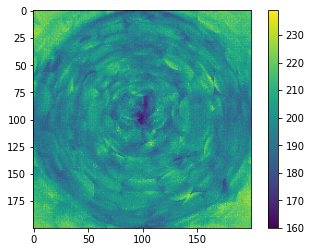

In [13]:
## Compute and visualize the mean projection of the stack
## using the np.max() function

IM_MAX = np.max(img, axis=0)
    
# Plot the max projection    
plt.imshow(IM_MAX, vmin=np.min(IM_MAX), vmax=np.max(IM_MAX))    
plt.colorbar()

The same result can be acheived by iterating through the stack using `enumerate`

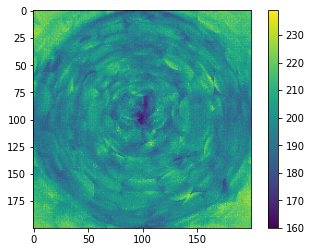

In [14]:
## Compute and visualize the max projection of the stack
## by iterating over the stack

# Get the number of slices
nSlices,_,_ = img.shape

# Initialize all pixel maxima to the values in the first slice
IM_MAX = img[0,:,:]

# Go through each slice and update the maxima
# The final result will be each pixel being the max
# of its values across all stacks
for iSlice in np.arange(1,nSlices):
    IM_MAX = np.maximum(IM_MAX, img[iSlice,:,:])
    
# Plot the max projection    
plt.imshow(IM_MAX)    
plt.colorbar()

This image shows a clear ringing artifact producing noise in the stack. For this stack, the max projection isn't as useful because objects are located at many different positions in the x-y plane. The max projection is more useful when objects are not stacked.

### Mean projection

The mean projection is not used as often because it dims features and doesn't give as much information.

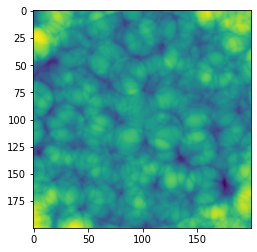

In [15]:
## Compute and visualize the mean projection of the stack

# Calculate the mean along the first dimension
IM_MEAN = np.mean(img, axis=0)
    
# Plot the mean projection    
plt.imshow(IM_MEAN)

### Other

The tutorial also gives another operation that it calls the mean projection. I don't think it is a mean projection, but I'm not sure what it is. Wanted to retain here in case I figure it out.

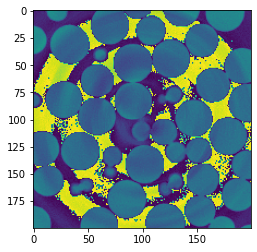

In [16]:
x,_,_ = img.shape
IM_MEAN = img[0,:,:]
for M in np.arange(1,x):
    IM_MEAN = IM_MEAN + M // 2
plt.imshow(IM_MEAN,vmin=0,vmax=255)

## Visualizing slices using slider

The `interact` and `IntSlider` functions from `ipywidgets` are helpful in visualizing an entire stack because they allow visualization of a single slice at a time with easy navigation between slices via a slider. 

In [17]:
from ipywidgets import interact,IntSlider

The code below illustrates how this behavior is accomplished through defining a function that performs our desired action that takes the slice index as input. The slider then allows the choice of a single slice. The code below also offers the option to downsample the image, which may be needed if the image size is large.

_Note:_ There are two interesting operators used in the code below. The first is `::`. This is a slicing operator that normally has the form `start:stop:step`. `::step` is a shortcut to start at the beginning, end at the end, and take steps of size `step` along the way. 

The second operator is the double division operator, `//`. This operator performs division followed by a round down to the nearest integer. This type of division is useful when working with integer-indexed images.

In [18]:
## View each slice of original stack using slider

# Determine the portion of pixels to sample within
# an image so that the displayed image size is not too large
downsample = 1 # change to larger number if image shape > 1k 

# Define a function to display a slice of a 3D image, sampled
# at a step size of the variable downsample
def slicer(z):
    plt.imshow(img[z,::downsample,::downsample], cmap='gray')

# Display a slider to go through the slices of the image
interact(slicer, z=IntSlider(min=0, max=len(img)-1, step=1, value=len(img)//2));

interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

We want to use this slider functionality to visualize many images through the rest of the workshop, so we define a function that takes an image and an optional color map and displays a slider to go through the slices of an image.

In [19]:
# Define a function with optional arguments that
def slicing(b,cmap='viridis'):
    
    # Defines a function that returns a slice of the image
    def slicer(z):
        plt.imshow(
            b[z,:,:],
            cmap=cmap, 
            vmin=np.min(b), 
            vmax=np.max(b)
        ) # without vmin/vmax = dynamic :( --> Not sure what this comment means
    
    # Then displays a slider to go through each slice
    interact(slicer, z=IntSlider(min=0,max=len(b)-1,step=1,value=len(b)//2))

We can also define functions to do more than just display the image slice. The code below shows a function that displays a single image slice and the image's grayscale histogram. Displaying multiple plots together can be useful for analyzing individual slices.

In [20]:
# Import some required functions and modules
from skimage.util import img_as_ubyte
from skimage.exposure import histogram

In [21]:
## Define a function that displays a slice and its histogram
def seeHistSlice(img,iSlice):
    # Make sure all values are between 0 and 255
    noisy_image = skimage.util.img_as_ubyte(img[iSlice,:,:])
    
    # Calculate the histogram
    hist, hist_centers = skimage.exposure.histogram(noisy_image)
    
    # Generate subplots
    fig, (win_left, win_right) = plt.subplots(ncols=2, figsize=(10, 5))

    # Plot the image slice on the left
    win_left.imshow(noisy_image, cmap=plt.cm.gray, vmin=0, vmax=np.max(img))
    win_left.set_title('Image slice')
    win_left.axis('off')

    # Plot the grayscale histogram on the right
    win_right.plot(hist_centers, hist, lw=2)
    win_right.set_title('Grayscale histogram')
    win_right.grid()

    # Make sure that axes and labels don't get clipped
    plt.tight_layout()

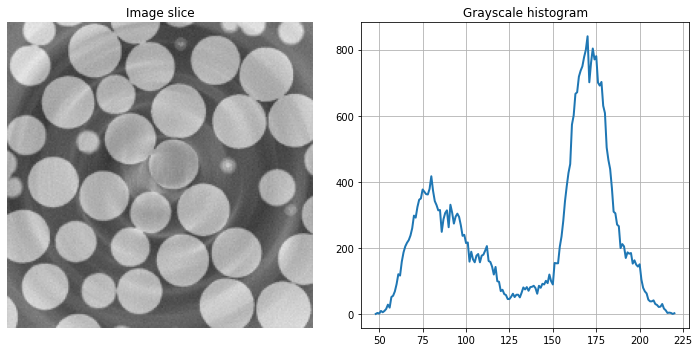

In [22]:
# Call the function for the middle slice
seeHistSlice(img, len(img)//2)

Now define a function to do this for the whole stack using a slider.

In [23]:
## Define a function that allows sliding through 
## image stack to display each image slice and 
## its histogram

def slicingHist(b):
    # Define function that takes slice from
    # slider and calls `seeHistSlice` on that 
    # slice
    def slicer(z):
        seeHistSlice(b,z)
        
    # Display slider
    interact(slicer, z=IntSlider(min=0,max=len(b)-1,step=1,value=len(b)//2))

In [24]:
# Call the function for the entire image
slicingHist(img)

interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

The histograms visualized above show us that the images are bimodal (i.e., their histograms have 2 large peaks).

## Adjusting exposure and applying filters

### Exposure

There are many different functions in the `skimage.exposure` module that allow adjusting the exposure of images:
- `skimage.exposure.cumulative_distribution(image) `
- `skimage.exposure.equalize(*args, **kwargs)`
- `skimage.exposure.equalize_adapthist(image[, ...])`
- `skimage.exposure.equalize_hist(image[, nbins])`
- `skimage.exposure.histogram(image[, nbins])`
- `skimage.exposure.rescale_intensity(image[, ...])`

In [25]:
import skimage.exposure

Adjust the exposure of the image using adaptive histogram equalization. This takes a little longer than the histogram equalization originally used in the workshop, but it does better at not amplifying noise.

In [26]:
## Apply CLAHE to each image in the stack and display
img_clahe = skimage.exposure.equalize_adapthist(img)
slicing(img_clahe,'gray')

interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

### Filters

In [27]:
import skimage.filters

The Laplace operator or Laplacian is a differential operator given by the divergence of the gradient of a function on Euclidean space. In a Cartesian coordinate system, the Laplacian is given by the sum of second partial derivatives of the function with respect to each independent variable. This operator can be used to find the edges of objects.

In [28]:
##Find the edges of an image using Laplacian
img2 = skimage.filters.laplace(img)
slicing(img2,'gray')

interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

Some operations and filters (like histogram equalization and the Laplacian filter) can be applied directly to a 3D image. Other functions require iteration over individual 2D slices to apply the filter. There are two examples given below with the `mean_bilateral` and `enhance_contrast` filters. Refer to the function documentation for the expected inputs and behavior.

In [29]:
## Apply the mean_bilateral filter in 3D

# %load solutions/ex03.py
# Load required functions
from skimage.filters.rank import mean_bilateral
from skimage.morphology import disk

# Set up empty filtered array
bilat = np.empty_like(img)

# Apply the filter to each slice individually
for iSlice, aSlice in enumerate(img):
    bilat[iSlice] = skimage.filters.rank.mean_bilateral(
        aSlice.astype(np.uint8), 
        skimage.morphology.disk(3), 
        s0=15, 
        s1=15
    )

# Display the stack interactively
slicing(bilat,'gray')    

interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

In [30]:
## Apply the enhance_contrast filter in 3D

# %load solutions/ex04.py
# Load required functions
from skimage.filters.rank import enhance_contrast

# Set up empty filtered array
contr = np.empty_like(img)

# Apply the filter to each slice individually
for iSlice, aSlice in enumerate(img):
    contr[iSlice]= skimage.filters.rank.enhance_contrast(
        aSlice.astype(np.uint16),
        skimage.morphology.disk(3))

slicing(contr,'gray')

interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

The `scipy.ndimage` submodule also has useful filters like `median_filter` that takes a shape (`footprint`) over which to apply the filter.

In [31]:
from scipy import ndimage as ndi
from skimage.morphology import ball

In [32]:
## Apply the median filter to the image in 3D
aBall = skimage.morphology.ball(radius=2) #3D structure element
median = ndi.median_filter(img,footprint=aBall) 
slicing(median,'gray')

interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

`ndimage` also has other filters like `grey_dilation` that englarges bright regions and shrinks dark regions.

In [33]:
# Transform raw image into a morphologically dilated one, using grayscale dilation 
gdil = ndi.grey_dilation(img,footprint=aBall)
slicing(gdil,'gray')

interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

## Thresholding and masks

Thresholding separates the foreground from the background and forms a binary image. This binary image is often called a mask, which can be used to select interesting parts of the original image or to segment objects. 

The `skimage.filters` module contains a convenient function `try_all_threshold` to try various thresholding algorithms to select the best one. First, use this function to threshold a single slice.

See slice: 100


(<Figure size 288x576 with 8 Axes>,
 array([<AxesSubplot:title={'center':'Original'}>,
        <AxesSubplot:title={'center':'Isodata'}>,
        <AxesSubplot:title={'center':'Li'}>,
        <AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'Minimum'}>,
        <AxesSubplot:title={'center':'Otsu'}>,
        <AxesSubplot:title={'center':'Triangle'}>,
        <AxesSubplot:title={'center':'Yen'}>], dtype=object))

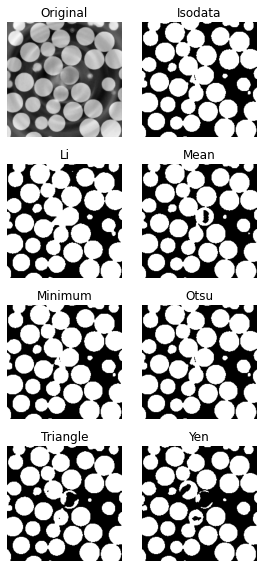

In [34]:
## Check all thresholding algorithms on the middle slice

# Select the middle slice of median and output index
iMid = len(img)//2 #middle
print("See slice: " + str(iMid))
aslice = median[iMid,:,:]

# Apply all thresholding algorithms and display
skimage.filters.try_all_threshold(aslice, figsize=(4,8), verbose=False)
#plt.savefig("thresholdAll.png", bbox_inches='tight')

Then, pick a thresholding algorithm and apply to the entire stack. We will use the `threshold_isodata` function.

In [35]:
## Get binary image using isodata threshold

# Find threshold
t = skimage.filters.threshold_isodata(bilat)

# Generate binary image against threshold
binary = bilat > t

slicing(binary,'gray')

interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

The binary image obtained by thresholding can now be used as a mask to select the "foreground" objects in the original image stack.

In [36]:
## Define a function that uses a slider to display slices
## of an original image with a mask applied (orig*binary)

def slicingMask(orig,binary):
    def slicer(z):
        plt.imshow(orig[z,:,:]*binary[z,:,:],cmap='gray',vmin=0, vmax=np.max(orig))
    interact(slicer, z=IntSlider(min=0,max=len(orig)-1,step=1,value=len(orig)//2))

In [37]:
# Visualize the masked image stack
slicingMask(img,binary)

interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

## Segmentation

Binary images can also be used for segmentation. Segmentation is the labeling of different objects. One function that can be used for segmentation is `skimage.measure.label`. The labels returned by this function are not easily visualized, but we can use the `skimage.color.label2rgb` function to convert the labels to an RGB image.

In [38]:
from skimage.measure import label
from skimage.color import label2rgb

In [39]:
# Label the objects
labeled = skimage.measure.label(binary.astype('int'), connectivity=2)

# Print the number of objects detected
nObjs = np.max(labeled)
print('Number of objects: ' + str(nObjs))

# Display labeled slices
slicing(skimage.color.label2rgb(labeled, bg_label=0))

Number of objects: 27


interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

The output above says that the number of objects detected is 27, but all of the objects are showing in the same color. We can display a single object by using `labeled[z] == <object index>` (the background is labeled as 0). 

In [40]:
def slicer(z,iObj):
    plt.imshow(skimage.color.label2rgb(labeled[z,::downsample,::downsample]==iObj, bg_label=0))

interact(
    slicer, 
    z=IntSlider(min=0, max=len(img)-1, step=1, value=len(img)//2), 
    iObj=IntSlider(min=1, max=nObjs, step=1, value=nObjs//2) 
)

interactive(children=(IntSlider(value=100, description='z', max=199), IntSlider(value=13, description='iObj', …

<function __main__.slicer(z, iObj)>

Using the slider above, we see that all of the objects we want to detect are labeled as a single object and the other "objects" detected are too small to see by eye. This is clearly not the behavior we want. 

To detect the objects more accurately, we need to clean up the binary image. The objects are all being detected as one object, so one strategy to pick them up separately would be to perform an erosion, where bright objects get smaller and dark regions get bigger. This can be done using the `skimage.morphology.binary_erosion` function.

In [41]:
from skimage.morphology import binary_erosion

In [42]:
# Define selected element
aBall = skimage.morphology.ball(radius=5) # Agressive

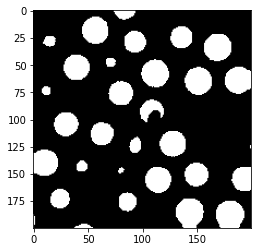

In [43]:
## Perform erosion and display
bin_e = skimage.morphology.binary_erosion(binary,selem=aBall)

plt.imshow(bin_e[iMid,:,:], cmap='gray')

Let's look at how the labeling does now

In [44]:
# Label the objects
labeled = skimage.measure.label(bin_e.astype('int'), connectivity=2)

# Print the number of objects detected
nObjs = np.max(labeled)
print('Number of objects: ' + str(nObjs))

# Display labeled slices
slicing(skimage.color.label2rgb(labeled, bg_label=0))

Number of objects: 299


interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

Like before, we are clearly picking up a lot of undetectable "objects" that are just noise. Chaining calls to `skimage.morphology.remove_holes` and `skimage.morphology.remove_small_objects` can help get rid of salt and pepper noise that often gets detected as objects. Let's get rid of the salt and pepper noise in the original binary image.

In [45]:
## Remove salt and pepper noise

# Define hole width
width = 20

# Remove holes
remove_holes = skimage.morphology.remove_small_holes(binary, area_threshold=width ** 2)

# Define minimum object width
width = 50

# Remove objects
cleaned = skimage.morphology.remove_small_objects(remove_holes, min_size=width)

Are we still picking up a lot of undetectable objects?

In [46]:
# Label the objects
labeled = skimage.measure.label(cleaned.astype('int'), connectivity=2)

# Print the number of objects detected
nObjs = np.max(labeled)
print('Number of objects: ' + str(nObjs))

# Display labeled slices
slicing(skimage.color.label2rgb(labeled, bg_label=0))

Number of objects: 2


interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

The number of objects is now down to 2 which means that we got rid of a lot of the incorrectly labeled objects. Let's perform the erosion again on the cleaned binary image and see how the labels do.

In [47]:
## Perform erosion on cleaned binary image, assign
## labels, and display

# Define selected element
aBall = skimage.morphology.ball(radius=5) 

# Perform erosion
bin_e = skimage.morphology.binary_erosion(cleaned,selem=aBall)

# Label the objects
labeled = skimage.measure.label(bin_e.astype('int'), connectivity=2)

# Print the number of objects detected
nObjs = np.max(labeled)
print('Number of objects: ' + str(nObjs))

# Display labeled slices
slicing(skimage.color.label2rgb(labeled, bg_label=0))

Number of objects: 298


interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

## Inspecting connected components

Once we have assigned labels to our objects there are many things we can do to further analyze the image. Let's take a look at the volumes of our objects compared to the median (not skewed as much by outliers). 

Before looking at properties of objects like volumes, we want to make sure to clear objects that are not completely contained within our stack. Otherwise, we may get partial objects which would skew the results. This action is called border clearing and can be done with the `skimage.segmentation.clear_border` function. We also want to follow this with a call to `skimage.morphology.remove_small_objects` to clear any artifacts from removed objects.

After clearing the objects from the edges, the remaining object labels will no longer be sequential. To fix this, we can use `skimage.segmentation.relabel_sequential`.

In [48]:
from skimage.segmentation import clear_border, relabel_sequential

In [49]:
## Clear objects from border, relabel remaining
## objects, and display

# Clear objects from the border
border_cleared_labels  = skimage.segmentation.clear_border(labeled)

# Remove small objects
border_cleared_labels = skimage.morphology.remove_small_objects(border_cleared_labels, min_size=200)

# Relabel remaining objects
objects_relabeled, _, _ = skimage.segmentation.relabel_sequential(border_cleared_labels)

# Print the number of objects remaining
nObjs_border_cleared = np.max(objects_relabeled)
print('Number of objects: ' + str(nObjs_border_cleared))

# Display labeled slices
slicing(skimage.color.label2rgb(objects_relabeled, bg_label=0))

Number of objects: 121


interactive(children=(IntSlider(value=100, description='z', max=199), Output()), _dom_classes=('widget-interac…

Let's compare a plot of the object volumes with and without the objects cleared from the border to illustrate why clearing border objects is important. 

First, let's use a naive approach to get the volumes of the objects without clearing the  border first.

In [50]:
## Get the volumes of all objects

# Find the location of each bead
allBeads = ndi.find_objects(labeled)

# Set up empty array for volumes
volumes_no_clearing = np.zeros(nObjs)

# For each bead
for iBead in range(nObjs):
    # Get the bead location
    loc = allBeads[iBead]
    
    # Get an array of just this bead
    bead = bin_e[loc]
    
    # Calculate the volume of the bead as the
    # sum of all non-zero (value=1) pixels in
    # the bead
    volumes_no_clearing[iBead] = np.sum(bead)

Next, do the same thing for the stack with the border cleared.

In [51]:
## Get the volumes of all objects not on the border

# Find the location of each bead
allBeads = ndi.find_objects(objects_relabeled)

# Set up empty array for volumes
volumes_border_cleared = np.zeros(nObjs_border_cleared)

# For each bead
for iBead in range(nObjs_border_cleared):
    # Get the bead location
    loc = allBeads[iBead]
    
    # Get an array of just this bead
    bead = objects_relabeled[loc]
    
    # Calculate the volume of the bead as the
    # count of all non-zero pixels in the bead
    volumes_border_cleared[iBead] = np.count_nonzero(bead)

Now plot both side by side for comparison

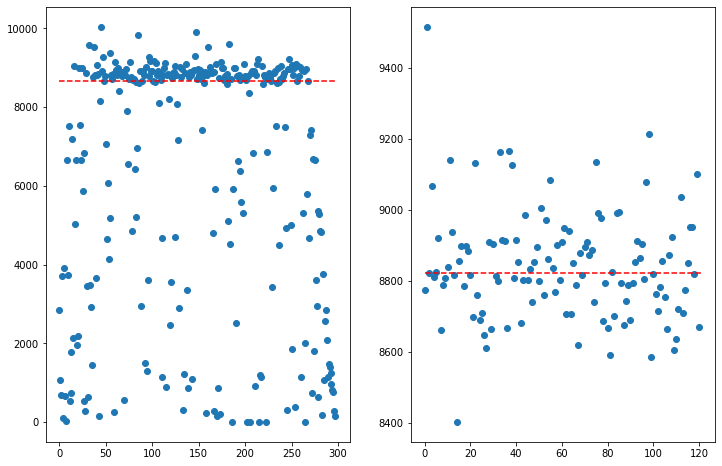

In [52]:
## Plot different volume calculations for comparison

# Get positions of subplots
_, (win_left, win_right) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the naive approach
win_left.plot(volumes_no_clearing,'o', zorder=1)
win_left.hlines(np.median(volumes_no_clearing), 0, nObjs, colors='red', linestyles='dashed', zorder=2)

# Plot the border-cleared approach
win_right.plot(volumes_border_cleared,'o', zorder=1)
win_right.hlines(
    np.median(volumes_border_cleared), 
    0, nObjs_border_cleared, 
    colors='red', 
    linestyles='dashed', 
    zorder=2
)

Note how the object volumes are all neatly grouped around the median when the objects are cleared from the border, getting rid of partial volumes. Not clearing objects from the border not only skews the median value, but it also provides a completely incorrect picture of the volume distribution of the objects.